In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino

## Session 03 - Linear and Logistic Regression

<img src='../../prasami_images/prasami_color_tutorials_small.png' style = 'width:400px;' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [2]:
###------------------
### Import statements
###------------------

import sys
import os
from time import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_moons
from collections import Counter

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter,
                               AutoMinorLocator)

In [3]:
# Some Basic Parameters for housekeeping

# set location of input files:
inpDir = os.path.join('Input')

# set location of inputs for this module
moduleDir = 'boston_housing'

# set location of output files
outDir = os.path.join('Output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.1
N_SAMPLES = 1000
ALPHA = 0.001

# parameters for Matplotlib
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 7),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.25

<Figure size 1500x700 with 0 Axes>

## SKLEARN Data sets
- Toy datasets : sklearn.datasets.load_
- Real world datasets : sklearn.datasets.fetch_
- Generate: sklearn.datasets.make_

## DataSet

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's



In [4]:
# CSV file name
boston_file = os.path.join(inpDir, moduleDir, 'boston_house_price.csv')

# Read the CSV file
data_df = pd.read_csv(boston_file)

# whats in the data
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


- ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles.
These summaries indicate that  both variables are conditional + categorical variables.

These columns may not be useful in regression task.

The original data description says: Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Hence, values = 50.00 may not help to predict MEDV. 

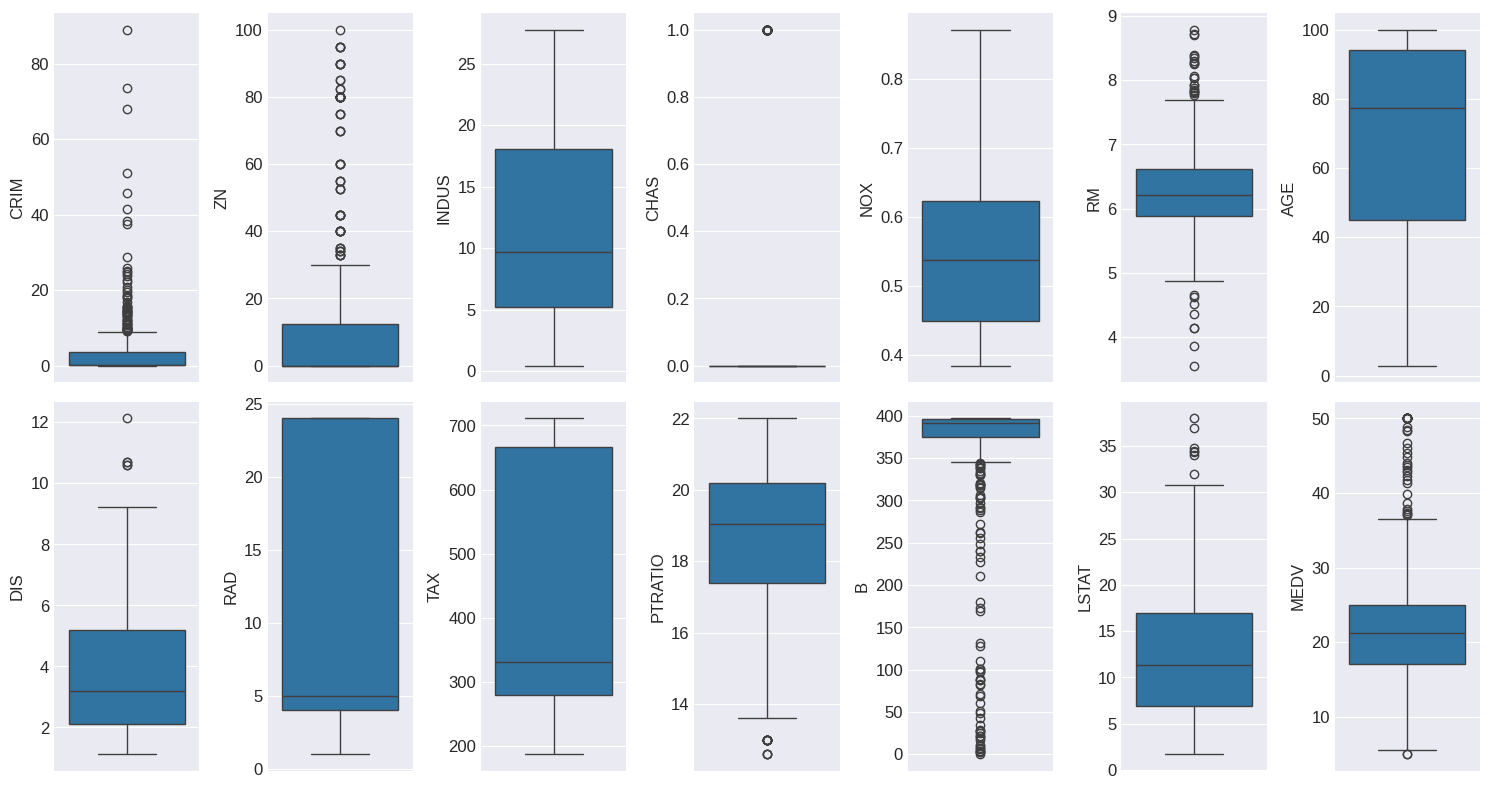

In [6]:
## Ploting Boxplot to see the data

fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(15, 8))

axes = axes.flatten()

for count, col in enumerate(data_df.columns):
    ax = axes[count]
    
    sns.boxplot(y=col, data=data_df, ax=ax)

 
plt.tight_layout();


In [7]:
## Lets remove all records with MEDV = 50
print('Before:', data_df.shape)
data_df = data_df[data_df['MEDV'] < 50].copy()
print('After:', data_df.shape)

Before: (506, 14)
After: (490, 14)


## Outliers
There are data points outside whiskers, but are they really outliers.

In [8]:
outlier_list = []

for count, col in enumerate(data_df.columns):
    # 1st quartile
    Q1 = np.percentile(data_df[col], 25)
    
    # 3rd quartile
    Q3 = np.percentile(data_df[col], 75)
    
    outlier_dis = (Q3-Q1) *1.5

    outlier_list.extend( data_df[data_df[col] < Q1 - outlier_dis].index )
    outlier_list.extend( data_df[data_df[col] > Q3 + outlier_dis].index )


outlier_count = Counter(outlier_list)
outlier_count

Counter({412: 4,
         414: 4,
         367: 3,
         374: 3,
         384: 3,
         438: 3,
         203: 3,
         282: 3,
         262: 3,
         373: 2,
         386: 2,
         387: 2,
         399: 2,
         404: 2,
         406: 2,
         407: 2,
         409: 2,
         410: 2,
         411: 2,
         413: 2,
         415: 2,
         416: 2,
         417: 2,
         418: 2,
         419: 2,
         420: 2,
         422: 2,
         425: 2,
         426: 2,
         427: 2,
         429: 2,
         431: 2,
         434: 2,
         435: 2,
         436: 2,
         437: 2,
         444: 2,
         445: 2,
         454: 2,
         190: 2,
         196: 2,
         197: 2,
         198: 2,
         202: 2,
         256: 2,
         274: 2,
         276: 2,
         277: 2,
         286: 2,
         291: 2,
         351: 2,
         352: 2,
         353: 2,
         354: 2,
         355: 2,
         152: 2,
         154: 2,
         155: 2,
         160: 

In [9]:
data_df.loc[[412, 414]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
412,18.8110,0.0,18.1,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0


In [10]:
## dropping these index as well
data_df = data_df.drop([412, 414], axis = 0).copy()
data_df.reset_index(inplace = True, drop=True)
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


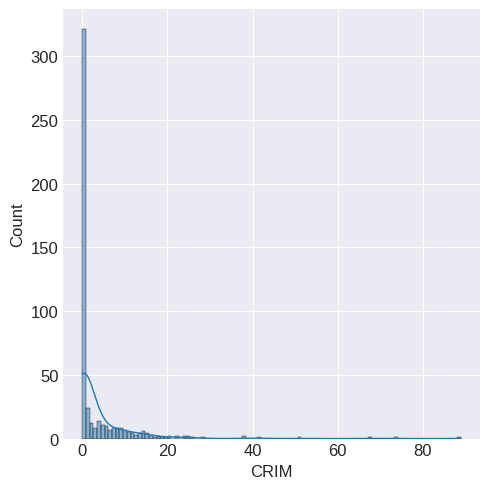

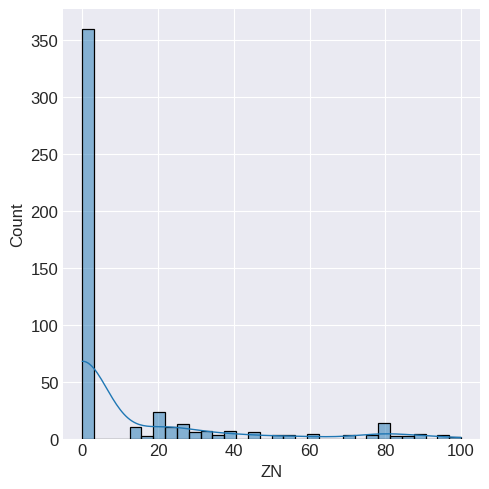

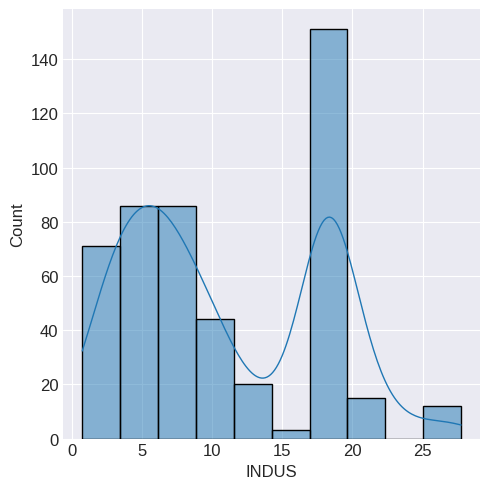

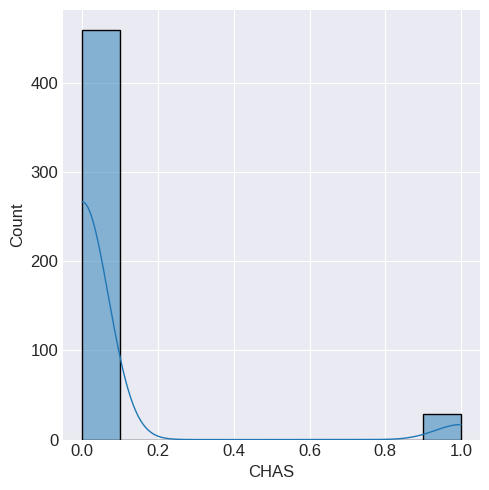

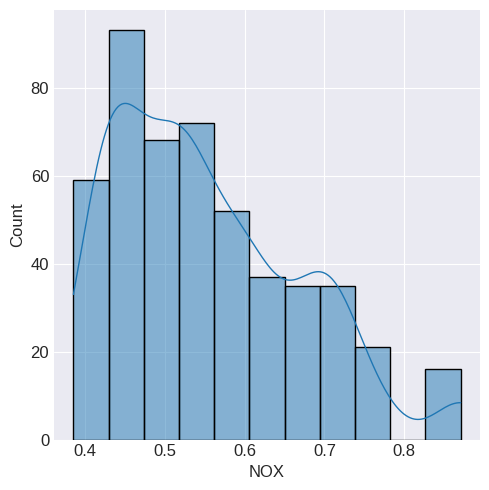

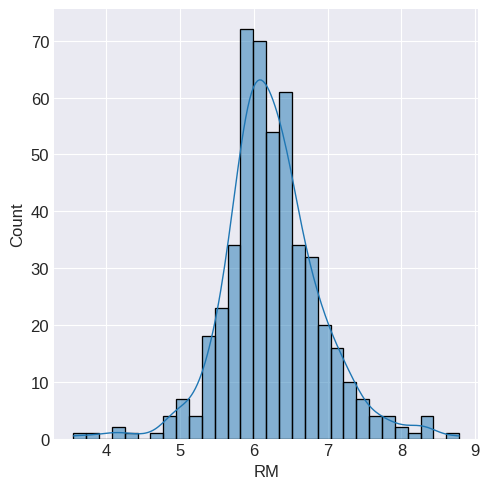

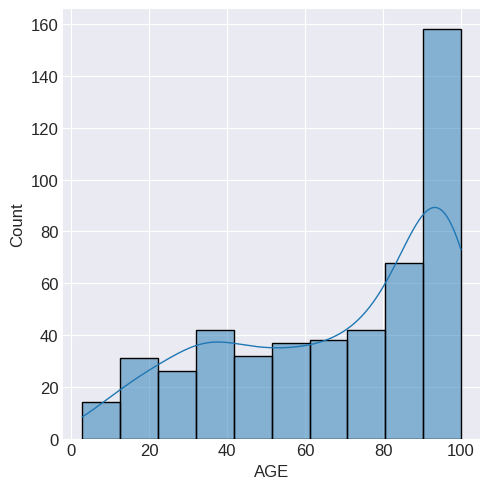

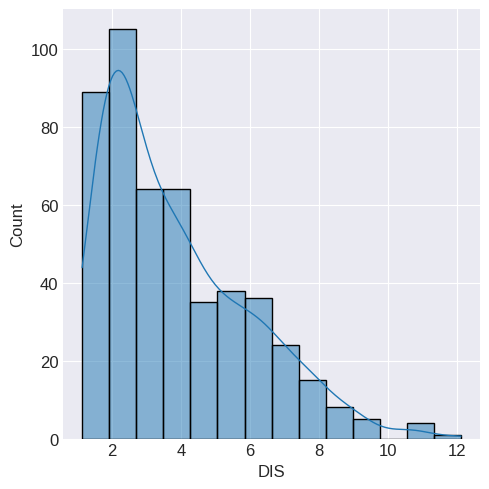

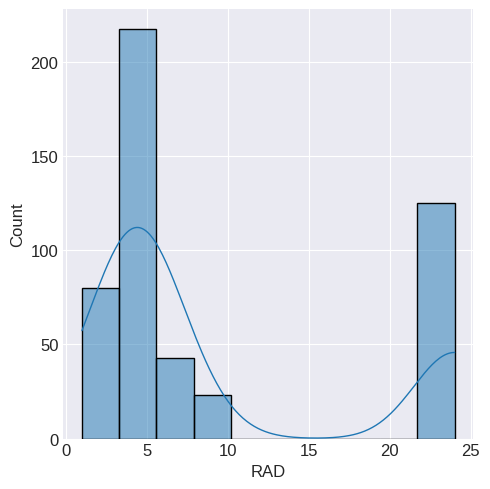

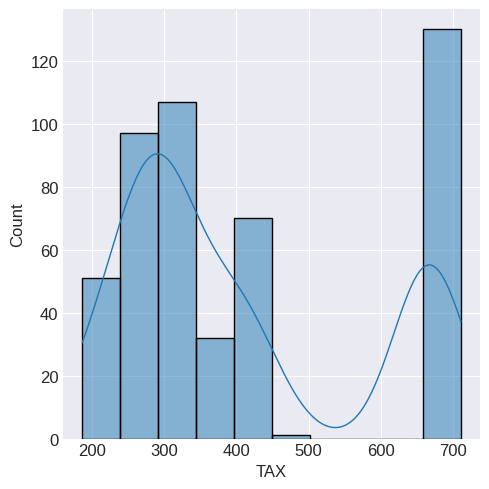

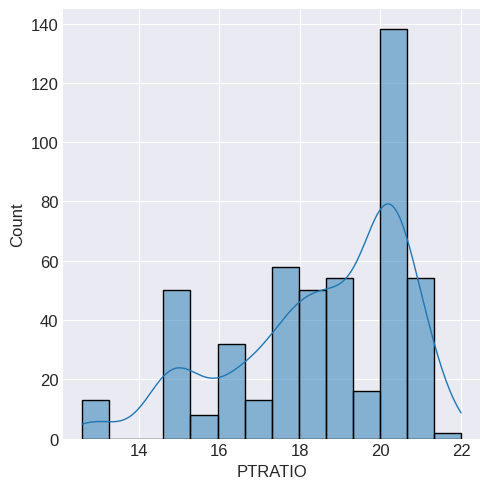

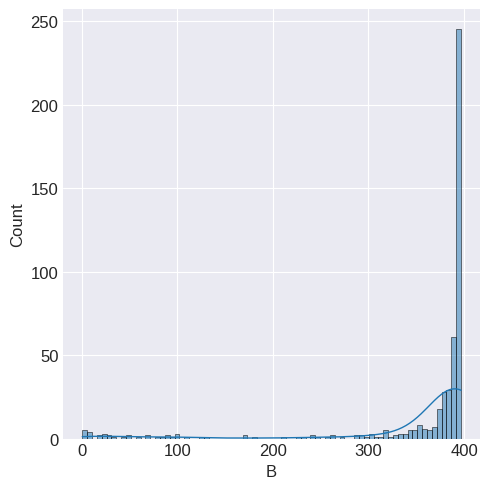

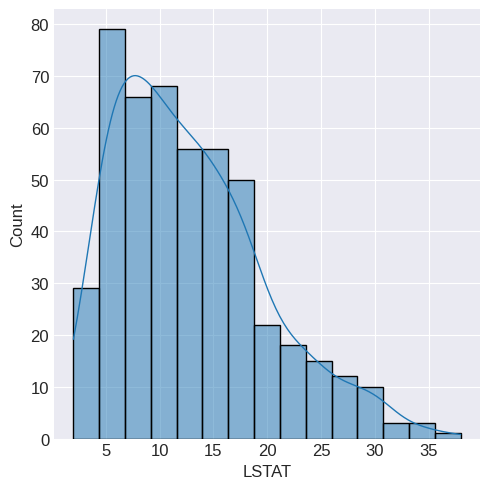

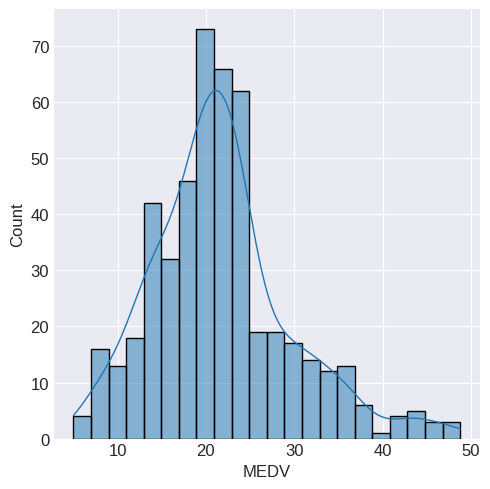

In [11]:
## Distribution plot

for count, col in enumerate(data_df.columns):
    
    sns.displot(data = data_df, x =col, kde=True)

RIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have normal or bimodel distribution of data except CHAS (which is a discrete variable).

Now let's plot the pairwise correlation on data.

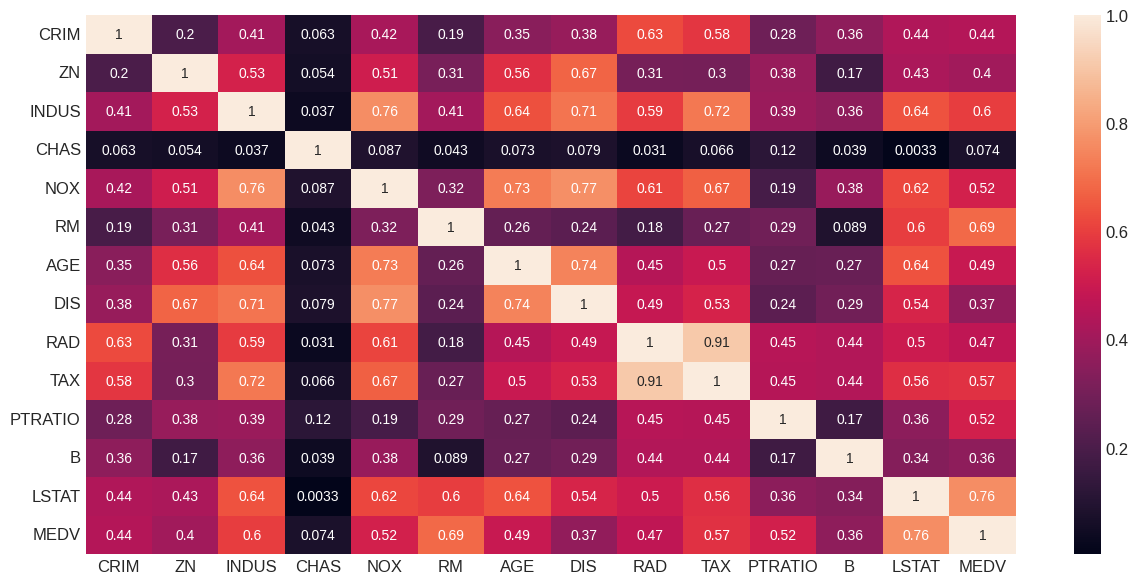

In [12]:
plt.figure()
sns.heatmap(data_df.corr().abs(),  annot=True);

From correlation matrix, we see TAX and RAD are highly correlated features.

The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors.

In [13]:
# Let's scale the columns before plotting them against MEDV
scaler = MinMaxScaler()

# Note we are selecting 
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX']

features = data_df[column_sels].copy()

target = data_df['MEDV']

features

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX
0,4.98,2.31,0.538,15.3,6.575,296.0
1,9.14,7.07,0.469,17.8,6.421,242.0
2,4.03,7.07,0.469,17.8,7.185,242.0
3,2.94,2.18,0.458,18.7,6.998,222.0
4,5.33,2.18,0.458,18.7,7.147,222.0
...,...,...,...,...,...,...
483,9.67,11.93,0.573,21.0,6.593,273.0
484,9.08,11.93,0.573,21.0,6.120,273.0
485,5.64,11.93,0.573,21.0,6.976,273.0
486,6.48,11.93,0.573,21.0,6.794,273.0


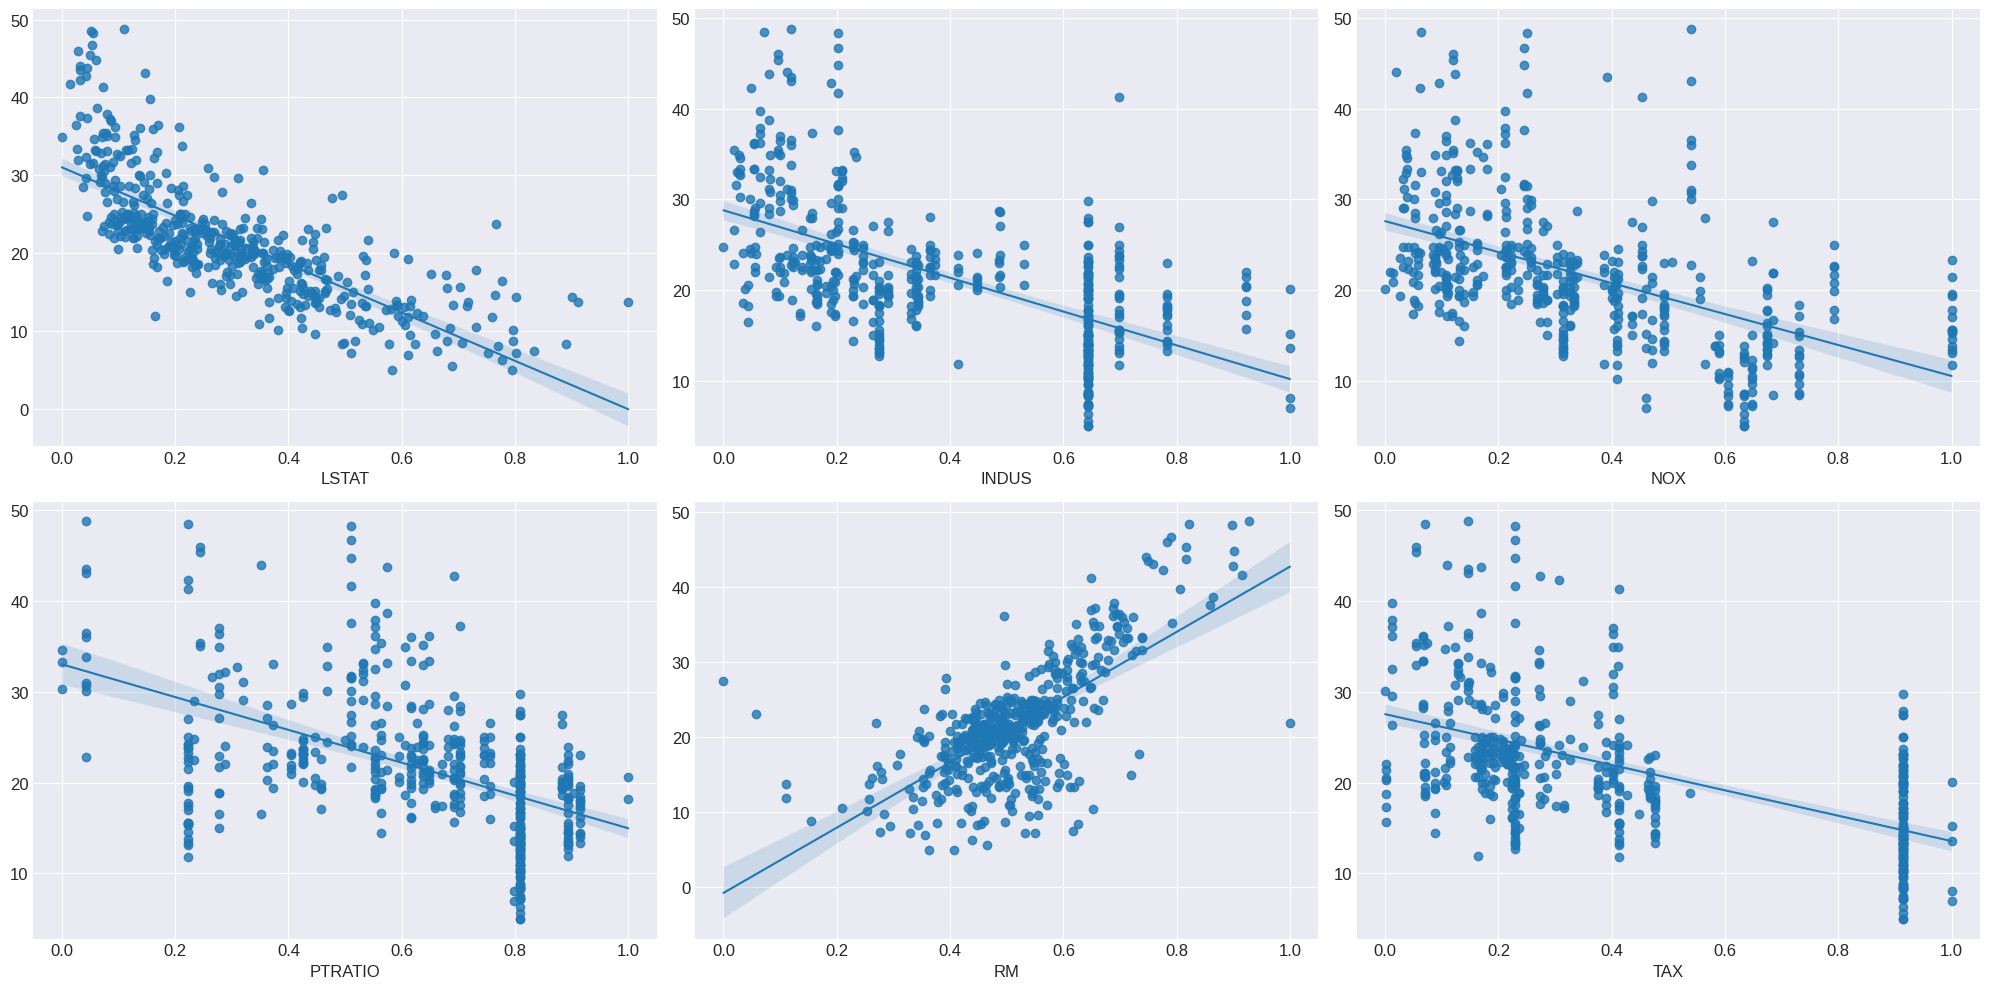

In [14]:
features = pd.DataFrame(data=scaler.fit_transform(features),
                        columns=column_sels)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))

axes = axes.flatten()

for count, col in enumerate(column_sels):
    
    sns.regplot(y=target.to_numpy(), x=features[col], ax=axes[count])

plt.tight_layout();

Majority of data has skew. For the purpose of this demo lets do log transformation of features where skew is more than 0.3

In [15]:
y =  np.log1p(target.to_numpy())

for col in features.columns:
    
    skw = features[col].skew()
    
    print (f'Column: {col} skew = {skw}')
    
    if np.abs(skw) > 0.3:
        
        print (f'Transforming column: {col}\n')
        
        features[col] = np.log1p(features[col])


Column: LSTAT skew = 0.8604768994068189
Transforming column: LSTAT

Column: INDUS skew = 0.33144787464438186
Transforming column: INDUS

Column: NOX skew = 0.761635563597596
Transforming column: NOX

Column: PTRATIO skew = -0.8174752121643623
Transforming column: PTRATIO

Column: RM skew = 0.22153074435383244
Column: TAX skew = 0.6931859447980313
Transforming column: TAX



In [16]:
reg = LinearRegression()

kf = KFold(n_splits=10)

scaler = MinMaxScaler()

X = scaler.fit_transform(features)

scores = cross_val_score(reg, X, y, cv=kf, scoring='neg_mean_squared_error')

print("MSE: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))


MSE: -0.0411 (+/- 0.0371)


In [17]:
reg.fit(X, y)
y_pred = reg.predict(X)

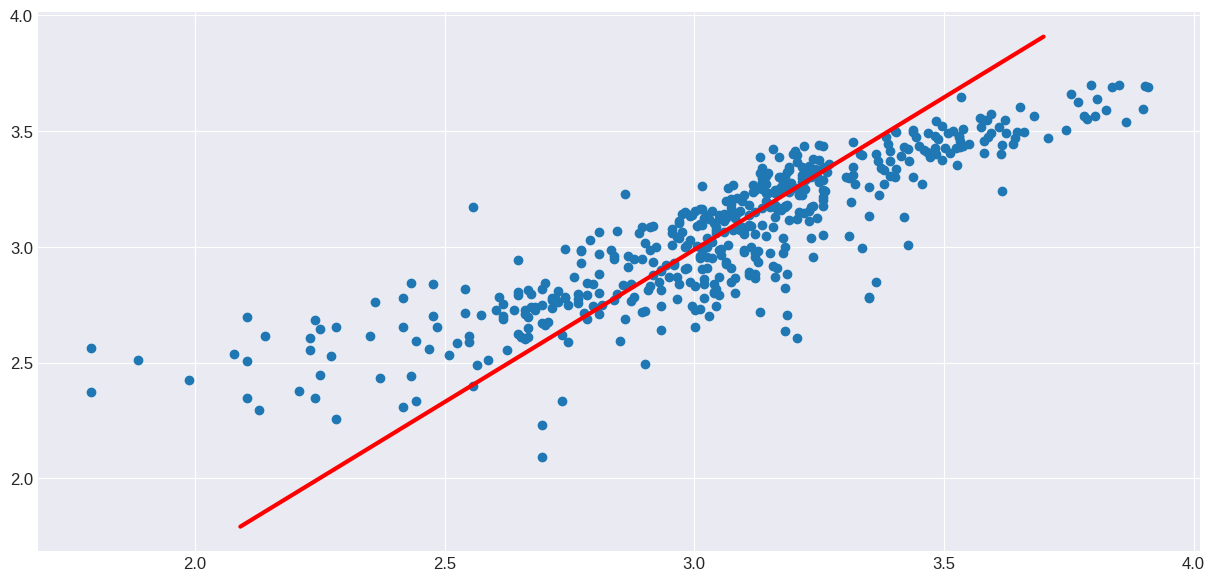

In [18]:
plt.scatter(y, y_pred)
plt.plot([y_pred.min(), y_pred.max()], [y.min(), y.max()], c = 'r', lw = 3)

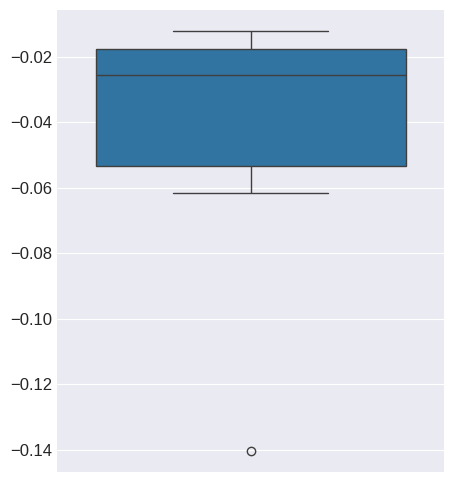

In [19]:
fig, ax = plt.subplots(figsize = (5,6))
sns.boxplot(data=scores, ax = ax);

## Gradient Descent
Assuming linear relationship between the data

In [20]:
# #N = 10
# #D = x.shape[1]
# X = np.zeros((N, D))
# X[:,0] = 1 # bias term
# X[:5,1] = 1
# X[5:,2] = 1
# Y = np.array([0]*5 + [1]*5)

# # print X so you know what it looks like
# print("X:", X)

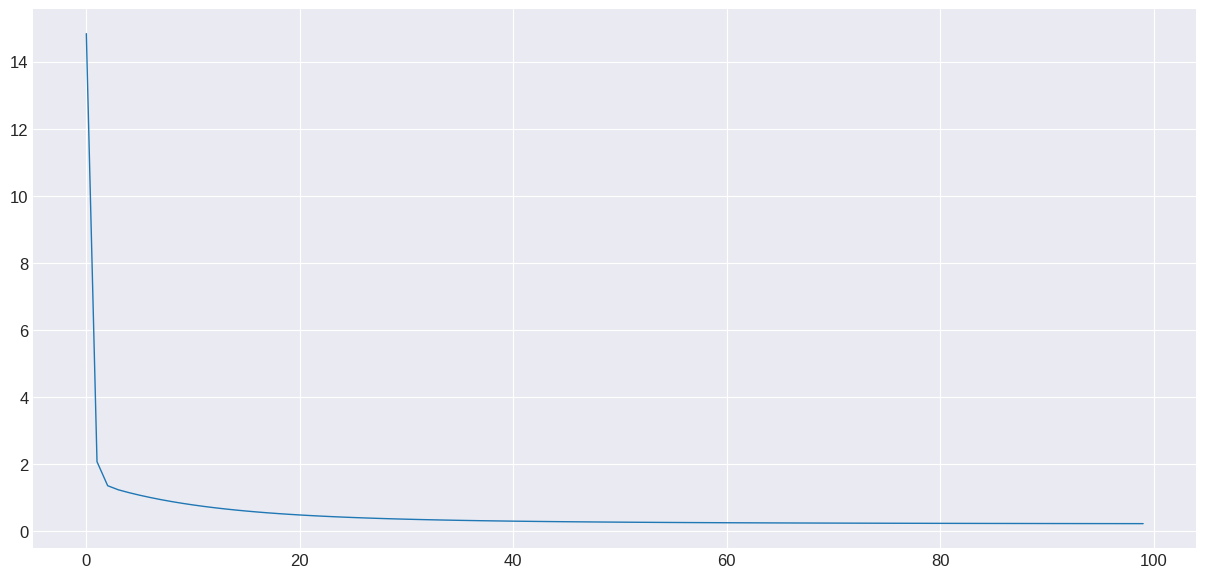

final w: [ 5.34277534e-01 -1.54536627e-03  3.32192248e-01  1.26508437e+00
  4.08432487e+00 -6.69211997e-01]


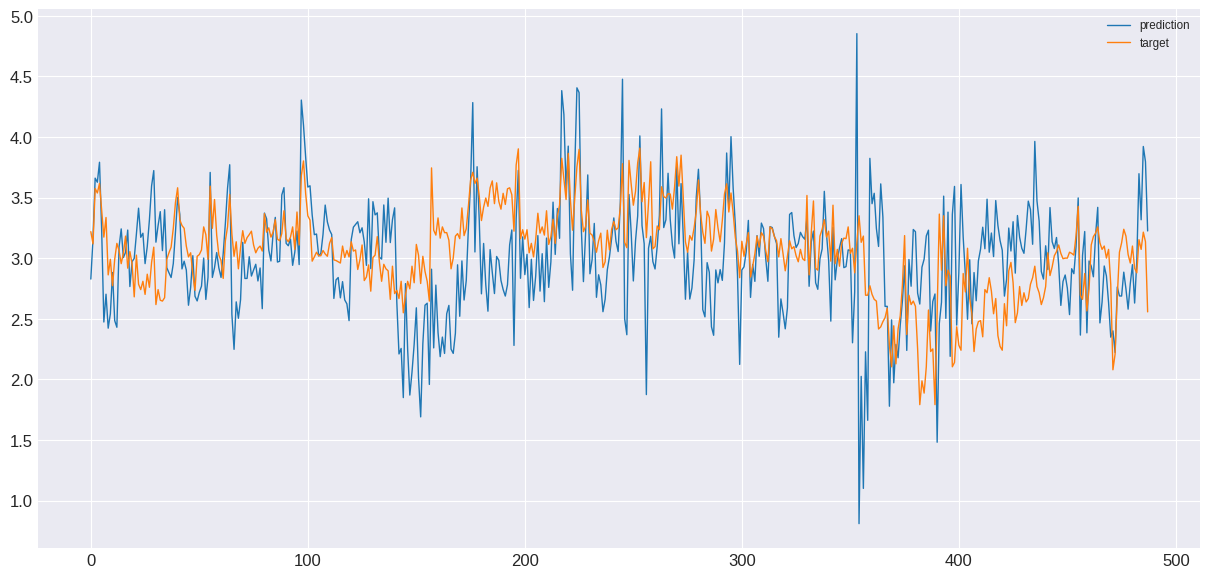

In [21]:
# won't work!
# w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))

# let's try gradient descent
costs = [] # keep track of squared error cost

w = np.random.randn(X.shape[1]) / np.sqrt(X.shape[1]) # randomly initialize w


for t in range(100):
    
    # update w
    y_pred = X.dot(w)
    delta = y_pred - y
    w = w - ALPHA * X. T. dot(delta)  # move small step as per error
    
    # find and store the cost
    mse = delta.dot(delta) / X.shape[0]
    costs.append(mse)

# plot the costs
plt.plot(costs)
plt.show()

print("final w:", w)

# plot prediction vs target
plt.plot(y_pred, label='prediction')
plt.plot(y, label='target')
plt.legend()
plt.show()

## [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

* log(odd) = $log(\frac{p}{1-p})$
### Case 1:Binary

In [22]:
X, y = make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.79254123,  0.81852609],
        [-0.86341583,  0.77353281],
        [ 1.94098477,  0.40538635],
        [-0.96149236,  0.06064943],
        [-0.98373033,  0.05715389]]),
 array([0, 0, 1, 0, 0]))

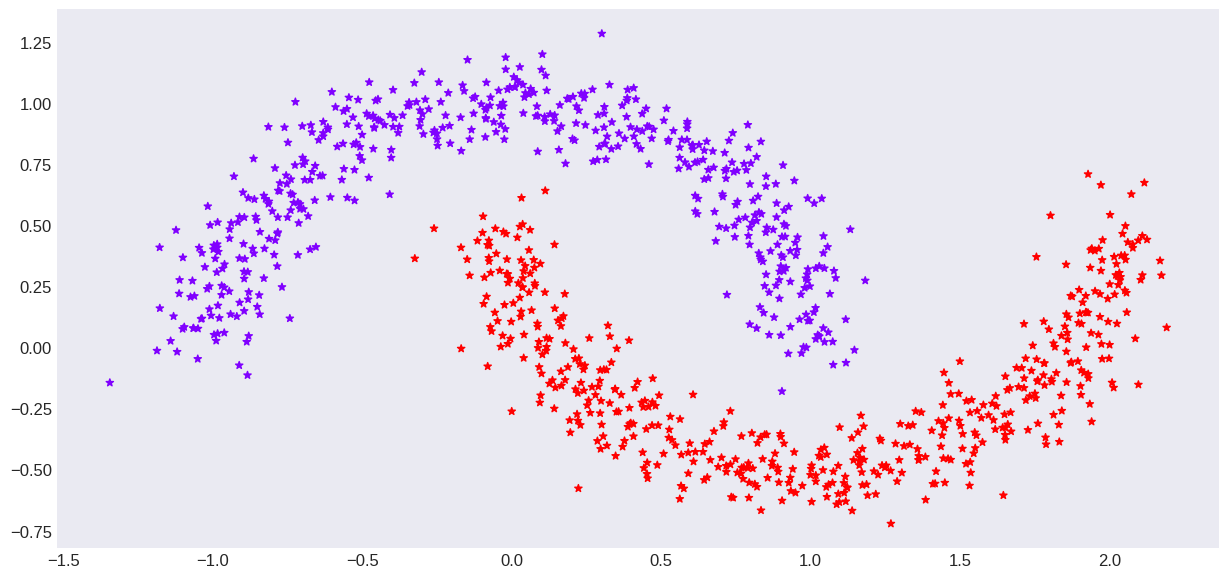

In [23]:
#### In case you want to plot X Array directly
plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=CMAP)
plt.grid();

In [24]:
clf= LogisticRegression(penalty=None, random_state=RANDOM_STATE)

clf.fit(X, y)

clf.predict(X[:2, :])


array([0, 0])

In [25]:
clf.predict_proba(X[:2, :])

array([[0.95142417, 0.04857583],
       [0.99034468, 0.00965532]])

In [26]:
clf.score(X, y)

0.881

In [27]:
clf

LogisticRegression(penalty=None, random_state=24)

## Decision Boundary

In [28]:
def fn_plot_decision_boundary(X :  np.ndarray, y :  np.ndarray, clf:  LogisticRegression = clf):
    
    '''
    Args:
        X :  Features
        y : Labels
        clf : Classifier
    '''
    
    fig, ax = plt.subplots(figsize = (15,12));
    
    dm = 0.01
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    XX = np.c_[xx.ravel(), yy.ravel()]
    
    
    y_pred = clf.predict(XX)        
    
    Z = np.array(y_pred).reshape(xx.shape)

    # Plotting contours for data as per testing
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    
    # Plotting scatter for train data
    ax.scatter(X[:, 0], X[:, 1], c=y,
                                  s=30, edgecolor='k', cmap=plt.cm.coolwarm)
        
    ax.set_title('Decision Boundary')

    ax.set_xlabel('A')
    
    ax.set_ylabel('B')
    
    plt.show()

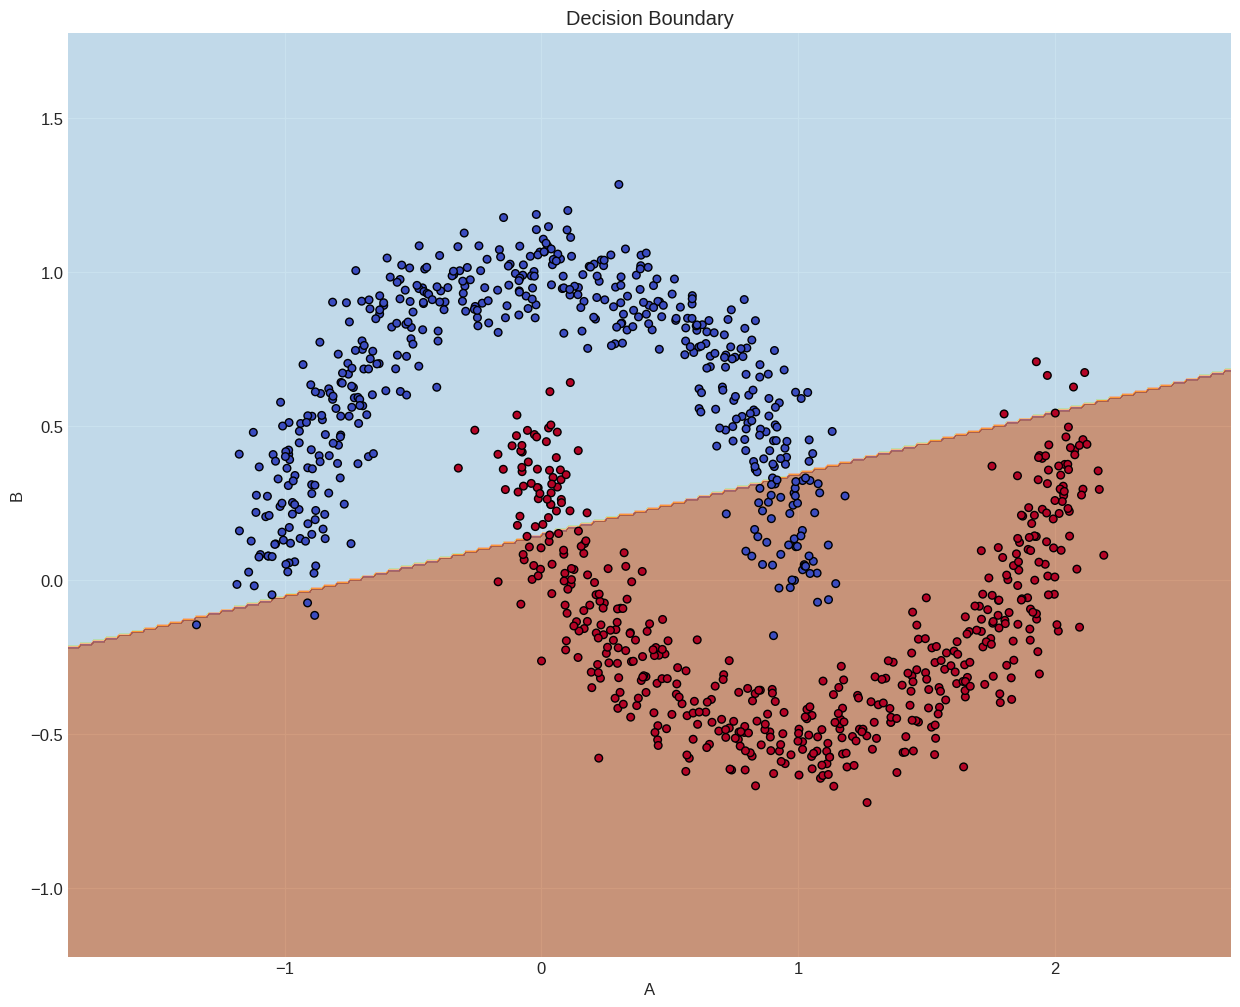

In [29]:
fn_plot_decision_boundary(X, y)

## Dataset 
We will be using all familiar IRIS data set.

In the multi-class case, the training algorithm uses the one-vs-rest (OvR) scheme if the `multi_class` option is set to `ovr`, and uses the cross-entropy loss if the `multi_class` option is set to `multinomial`.

In [30]:
moduleDir = 'machine_learning'

In [31]:
# CSV file name
iris_file = os.path.join(inpDir, moduleDir, 'iris.csv')

# Define feature names

iris_features = ['sepal length',
                 'sepal width',
                 'petal length',
                 'petal width',
                 'target']
# Read the CSV file
iris_df = pd.read_csv(iris_file, sep=',', skiprows=1, 
                      header=None, names = iris_features)

## EDA

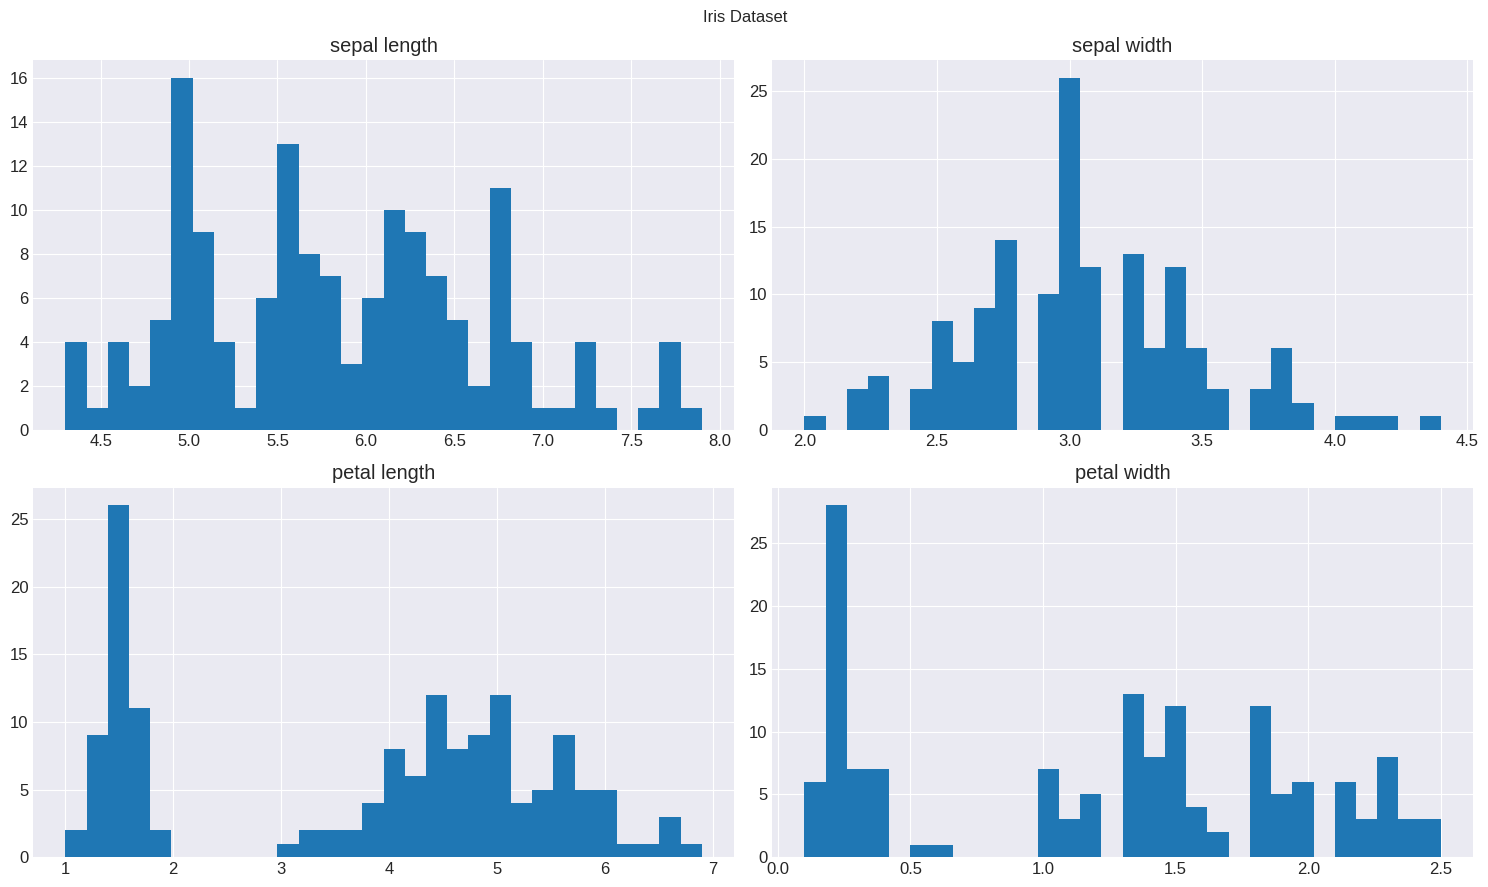

In [32]:
# Plot the features
fig = plt.figure( figsize = (15 , 9) )

fig.suptitle('Iris Dataset')

for count, col in enumerate(iris_df.columns[:-1]):
    
        # Add the first set of axes (subplot 1)
        ax = fig.add_subplot(2, 2, count+1)  # 2 row, 2 columns
                
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        
        n, bins, patches = ax.hist( iris_df [col], 30)
        
        ax.set_title('{}'.format(iris_df.columns[count]))
        
        ax.axis('tight')

        #plt.legend(loc = 'best')

plt.tight_layout()

plt.show()

## Feature Extraction

Extract features and labels from the dataframe.

**Remember:** We can use only numerical values in the features and labels. Incidentally, Iris dataset contains numerical values only.

In [33]:
features = iris_df.drop('target',axis=1)
labels = iris_df['target']

In [34]:
scaler = MinMaxScaler()
X = scaler.fit_transform(features)
y = labels.to_numpy()
X.shape, y.shape

((150, 4), (150,))

In [35]:
# Some helpers to format the plot
target_names = ['setosa','versicolor','virginica']

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: target_names[int(i)])

# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='aqua', alpha=0.5)

## One vs. Rest

<img src = '../../images/one_vs_rest.png'>

As shown above we can have three classifiers, each trained to predict the probability that y = i. To make predictions, run all and pick: <b> $max_i h_\theta^i (x)$ </b>

In [36]:
# instantiate
clf= LogisticRegression(penalty=None,
                        multi_class='ovr',
                        random_state=RANDOM_STATE)


# fit the classifier
clf.fit(features, labels)

# make predictions
y_pred = clf.predict(features)

In [37]:
# Let's use first two columns of the data and plot the data to visualize the results
xplot = iris_df.keys()[0]

yplot = iris_df.keys()[1]


# also locate instances which are incorrectly predicted.
x_err = iris_df[xplot][(labels != y_pred)]
y_err = iris_df[yplot][(labels != y_pred)]

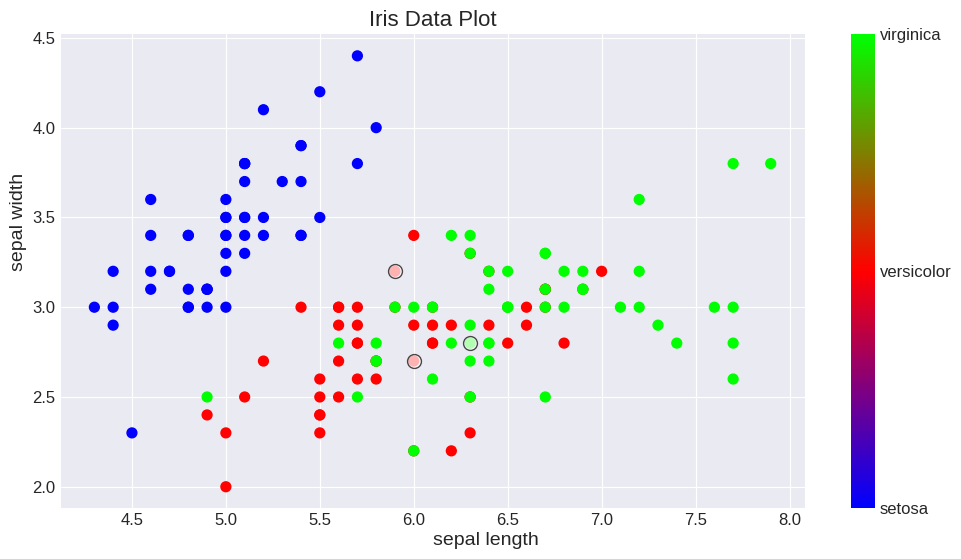

In [38]:
# Plot the data points

# Create a figure of given size
fig = plt.figure(figsize=(12,6))

# Add a subplot
ax = fig.add_subplot(111)

# Set title
title = 'Iris Data Plot'

plt.scatter( iris_df[xplot], iris_df[yplot], s = 50, 
            c = iris_df['target'], 
            cmap=plt.cm.brg) # , 

plt.colorbar(ticks=[0, 1, 2], format=formatter)

plt.scatter(x_err, y_err, color = "w", label="mismatch", 
            s = 100, alpha = 0.7, edgecolor = 'black')

# Grid lines inside plot can be set as True or False
ax.grid(True)

# Plot frame can be set as true or false
ax.set_frame_on(True)

 
# Customize title, set position, allow space on top of plot for title
ax.set_title(title, fontsize=16, ha='center')

plt.subplots_adjust(top=0.9)

ax.title.set_position((0.5,1))

# Set x axis label
ax.xaxis.set_label_position('bottom')

ax.set_xlabel(xplot, fontsize=14,  ha='left') 

ax.xaxis.set_label_coords(0.5, -0.05)

# Set y axis label
ax.set_ylabel(yplot, fontsize=14,  ha='left') 

plt.show()

In [39]:
iris_correct = iris_df[(labels == y_pred)]


accuracy = (iris_correct.shape[0]/iris_df.shape[0])

print ("We have predicted {:d} points correctly out of {:d} points".format (
        iris_correct.shape[0],iris_df.shape[0] ))

print ("Hence, the accuracy is {:5.3f}".format(accuracy))

We have predicted 147 points correctly out of 150 points
Hence, the accuracy is 0.980


We can also use `sklearn` built-in function to calculate accuracy.

In [40]:
accuracy = accuracy_score(labels, y_pred)

print ("The accuracy is {:5.3f}".format(accuracy))

The accuracy is 0.980


## Multinomial Logistic Model

The Multinomial Logistic Regression (also known as softmax regression, maximum entropy classifier, or multinomial logit model) is an extension of the binary logistic regression to handle problems where there are more than two possible discrete outcomes. It is commonly used for classification tasks where the dependent variable has more than two categories.

In [41]:
# instantiate
clf= LogisticRegression(penalty=None,
                        multi_class='multinomial',
                        random_state=RANDOM_STATE)

# fit the classifier
clf.fit(features, labels)

# make predictions
y_pred = clf.predict(features)

In [42]:
accuracy = accuracy_score(labels, y_pred)

print ("The accuracy is {:5.3f}".format(accuracy))

The accuracy is 0.987


## Sigmoid Function

The sigmoid function, also called the sigmoidal curve (von Seggern 2007, p. 148) or logistic function, is the s shaped function represented by:

R(z) = $\frac{1}{1 + e^{-z}}$

In [43]:
# create x data points
x_min = -5
x_max = 5
step = 0.01
x_range = np.arange(x_min, x_max, step) # create an array in the range

data_df = pd.DataFrame(x_range, columns = ['x'], dtype = np.float64)#.round(4)
data_df.head()

,x
0,-5.00
1,-4.99
2,-4.98
3,-4.97
4,-4.96


In [44]:
# Function for plotting

def fn_plot_activation(axes, df, c1, c2, yMajLoc = 1, yMinLoc = 0.2):
    
    '''
    Args:
        axes : need two axes to plot function and its prime
        df : dataframe having values
        c1, c2: str column names to plot
        yMajLoc = 1, yMinLoc = 0.2 : Major and minor ticks spacing on y axis
    
    '''
    

    # for plotting of function
    ax = axes[0]
    
    # plot column 1 (function it self) 
    df.plot(x = 'x', y = c1, ax = ax, c = 'b', rot = 90, lw=3)
    
    ax.set_xlabel ('Input')
    
    # horizontal lines for axis marking
    ax.axhline(0, c = 'k', lw = 2)
    ax.axvline(0, c = 'k', lw=2)
    
    # set major axis and format display of labels
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%3.1f'))

    # For the minor ticks, use no labels; default NullFormatter
    ax.xaxis.set_minor_locator(MultipleLocator(0.2))

    # set major axis and format display of labels
    ax.yaxis.set_major_locator(MultipleLocator(yMajLoc))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%3.1f'))

    # For the minor ticks, use no labels; default NullFormatter.
    ax.yaxis.set_minor_locator(MultipleLocator(yMinLoc))
    
    # Now using second axis for plotting derivative
    ax = axes[1]
    df.plot(x = 'x', y = c2, ax = ax, c = 'b', rot = 90, lw=3)
    
    ax.set_xlabel ('Input')
    
    # horizontal lines for axis marking
    ax.axhline(0, c = 'k', lw = 2)
    ax.axvline(0, c = 'k', lw = 2)
    
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%3.1f'))

    # For the minor ticks, use no labels; default NullFormatter.
    ax.xaxis.set_minor_locator(MultipleLocator(0.2))

    ax.yaxis.set_major_locator(MultipleLocator(yMajLoc))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%3.1f'))

    # For the minor ticks, use no labels; default NullFormatter.
    ax.yaxis.set_minor_locator(MultipleLocator(yMinLoc))
    

# Function to mark equation on the image
def fn_plot_equation(ax, x , y, text):
    '''
        ax : axis 
        x  : Horizontal position
        y  : Vertical position
        text : text to plot
    '''
    
    ax.text(x, y, text, {'color': 'k',
                         'fontsize': 'xx-large',
                         'verticalalignment' : 'top',
                         'horizontalalignment' : 'left',
                         #'fontweight' :'bold',
                         'style' : 'italic'},
            
            bbox={'facecolor': 'cyan',
                  'alpha': 0.3,
                  'pad': 5 })

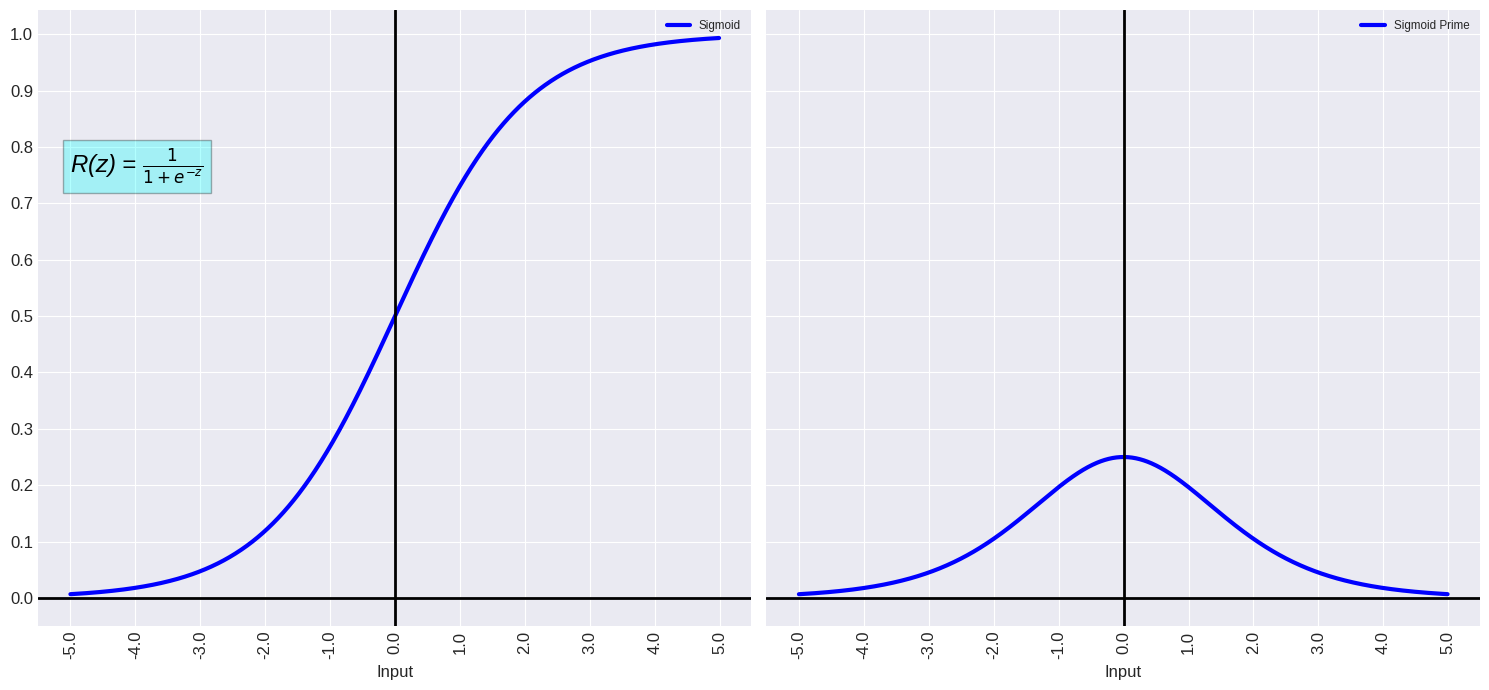

In [45]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * ( 1 - sigmoid(z))


col1 = 'Sigmoid'
col2 = 'Sigmoid Prime'

# add two columns in the dataframe for function values and its prime
data_df[col1] = data_df['x'].apply(lambda x: sigmoid (x))
data_df[col2] = data_df['x'].apply(lambda x: sigmoid_prime (x))

# create figure and its axis objects
fig, axes = plt.subplots(1, 2, sharey=True)

# Select Major and Minor axis formatings
yMajorLocator = 0.1
yMinorLocator = 0.02
fn_plot_activation(axes, data_df, col1, col2, yMajorLocator, yMinorLocator)

# Define the equation
eq1 = r'R(z) = $\frac{1}{1 + e^{-z}}$'

ax = axes[0]
xLoc = -5
yLoc = 0.8

fn_plot_equation(ax, xLoc , yLoc, eq1)
plt.tight_layout()
plt.savefig(os.path.join(outDir, '{}.png'.format(col1.lower())))